In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name.
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip3 install numpy --user' into the console.
# If you're getting an error with another package, type 'sudo pip3 install PACKAGENAME --user'. 
# Replace PACKAGENAME with the relevant package (such as pandas, etc).
from pyspark.ml.regression import LinearRegression

# First, let's import the data. Note that we can infer the schema as it's a CSV file.
df_countryori = spark.read.csv("Datasets/IVS_Country.csv",inferSchema=True,header=True)
df_agegroupori = spark.read.csv("Datasets/IVS_AgeGroup.csv",inferSchema=True,header=True)
df_accomodationori = spark.read.csv("Datasets/IVS_Accomodation.csv",inferSchema=True,header=True)

In [2]:
# Let's explore. Here's the first row of the data.
print(df_countryori.head())

# And the entire data structure. 
df_countryori.printSchema()

Row(Pkey=1, Year=1997, Quarter=4, Year ending='YEDec 1997', Airport of departure='Auckland', Purpose of visit='Business', Country of permanent residence='Africa and Middle East', Total visitor spend=4266524.07, Total visitors=1684)
root
 |-- Pkey: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Year ending: string (nullable = true)
 |-- Airport of departure: string (nullable = true)
 |-- Purpose of visit: string (nullable = true)
 |-- Country of permanent residence: string (nullable = true)
 |-- Total visitor spend: double (nullable = true)
 |-- Total visitors: integer (nullable = true)



In [3]:
# Let's explore. Here's the first row of the data.
print(df_agegroupori.head())

# And the entire data structure. 
df_agegroupori.printSchema()

Row(Pkey=1, Year=1997, Quarter=4, Year ending='YEDec 1997', Airport of departure='Auckland', Purpose of visit='Business', Age band='20 - 24', Total visitor spend=6588341.03, Total visitors=2394)
root
 |-- Pkey: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Year ending: string (nullable = true)
 |-- Airport of departure: string (nullable = true)
 |-- Purpose of visit: string (nullable = true)
 |-- Age band: string (nullable = true)
 |-- Total visitor spend: double (nullable = true)
 |-- Total visitors: integer (nullable = true)



In [4]:
# Let's explore. Here's the first row of the data.
print(df_accomodationori.head())

# And the entire data structure. 
df_accomodationori.printSchema()

Row(Pkey=1, Year=1997, Quarter=4, Year ending='YEDec 1997', Main accommodation used='  A house you own', Total visitors=None)
root
 |-- Pkey: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Year ending: string (nullable = true)
 |-- Main accommodation used: string (nullable = true)
 |-- Total visitors: integer (nullable = true)



In [5]:
#group by year
dfg_country = df_countryori.groupby('Year').count()
print("Total data points:", dfg_country.count())
dfg_country.orderBy('count', ascending=True).show()

#Reduce imcomplete data
df_country=df_countryori
df_country = df_country[(df_country['Year'] > 1997) & (df_country['Year'] <2018)]



Total data points: 22
+----+-----+
|Year|count|
+----+-----+
|2018|  208|
|1997|  208|
|2003|  832|
|2007|  832|
|2013|  832|
|2015|  832|
|2006|  832|
|2009|  832|
|2001|  832|
|2014|  832|
|2004|  832|
|1998|  832|
|2012|  832|
|2016|  832|
|2005|  832|
|2000|  832|
|2010|  832|
|2011|  832|
|2008|  832|
|2017|  832|
+----+-----+
only showing top 20 rows



In [6]:

#group by quarter
dfg_country = df_country.groupby('Quarter').count()
print("Total data points:", dfg_country.count())
dfg_country.orderBy('Quarter', ascending=True).show()

Total data points: 4
+-------+-----+
|Quarter|count|
+-------+-----+
|      1| 4160|
|      2| 4160|
|      3| 4160|
|      4| 4160|
+-------+-----+



In [7]:

#group by Airport of departure
dfg_country = df_country.groupby('Airport of departure').count()
print("Total data points:", dfg_country.count())
dfg_country.orderBy('Airport of departure', ascending=True).show()

Total data points: 4
+--------------------+-----+
|Airport of departure|count|
+--------------------+-----+
|            Auckland| 4160|
|        Christchurch| 4160|
|          Queenstown| 4160|
|          Wellington| 4160|
+--------------------+-----+



In [8]:
#group by Purpose of visit
dfg_country = df_country.groupby('Purpose of visit').count()
print("Total data points:", dfg_country.count())
dfg_country.orderBy('Purpose of visit', ascending=True).show()

Total data points: 4
+--------------------+-----+
|    Purpose of visit|count|
+--------------------+-----+
|            Business| 4160|
|  Holiday / vacation| 4160|
|               Other| 4160|
|Visiting friends ...| 4160|
+--------------------+-----+



In [9]:
#group by Country of permanent residence
dfg_country = df_country.groupby('Country of permanent residence').count()
print("Total data points:", dfg_country.count())
dfg_country.orderBy('Country of permanent residence', ascending=True).show()

Total data points: 13
+------------------------------+-----+
|Country of permanent residence|count|
+------------------------------+-----+
|          Africa and Middle...| 1280|
|                     Australia| 1280|
|                        Canada| 1280|
|                         China| 1280|
|                       Germany| 1280|
|                         Japan| 1280|
|            Korea, Republic of| 1280|
|              Rest of Americas| 1280|
|                  Rest of Asia| 1280|
|                Rest of Europe| 1280|
|               Rest of Oceania| 1280|
|                            UK| 1280|
|                           USA| 1280|
+------------------------------+-----+



In [10]:
dfg_agegroup = df_agegroupori.groupby('Year').count()
print("Total data points:", dfg_agegroup.count())
dfg_agegroup.orderBy('count', ascending=True).show()

#Reduce imcomplete data
df_agegroup=df_agegroupori
df_agegroup = df_agegroup[(df_agegroup['Year'] > 1997) & (df_agegroup['Year'] <2018)]


Total data points: 22
+----+-----+
|Year|count|
+----+-----+
|1997|  224|
|2018|  224|
|2003|  896|
|2007|  896|
|2015|  896|
|2014|  896|
|2006|  896|
|2013|  896|
|2001|  896|
|2000|  896|
|2004|  896|
|1998|  896|
|2012|  896|
|2009|  896|
|2016|  896|
|2005|  896|
|2010|  896|
|2011|  896|
|2008|  896|
|2017|  896|
+----+-----+
only showing top 20 rows



In [11]:
#group by quarter
dfg_agegroup = df_agegroup.groupby('Quarter').count()
print("Total data points:", dfg_agegroup.count())
dfg_agegroup.orderBy('Quarter', ascending=True).show()

Total data points: 4
+-------+-----+
|Quarter|count|
+-------+-----+
|      1| 4480|
|      2| 4480|
|      3| 4480|
|      4| 4480|
+-------+-----+



In [12]:

#group by Airport of departure
dfg_agegroup = df_agegroup.groupby('Airport of departure').count()
print("Total data points:", dfg_agegroup.count())
dfg_agegroup.orderBy('Airport of departure', ascending=True).show()

Total data points: 4
+--------------------+-----+
|Airport of departure|count|
+--------------------+-----+
|            Auckland| 4480|
|        Christchurch| 4480|
|          Queenstown| 4480|
|          Wellington| 4480|
+--------------------+-----+



In [13]:
#group by Purpose of visit
dfg_agegroup = df_agegroup.groupby('Purpose of visit').count()
print("Total data points:", dfg_agegroup.count())
dfg_agegroup.orderBy('Purpose of visit', ascending=True).show()

Total data points: 4
+--------------------+-----+
|    Purpose of visit|count|
+--------------------+-----+
|            Business| 4480|
|  Holiday / vacation| 4480|
|               Other| 4480|
|Visiting friends ...| 4480|
+--------------------+-----+



In [14]:
#group by Purpose of visit
dfg_agegroup = df_agegroup.groupby('Age band').count()
print("Total data points:", dfg_agegroup.count())
dfg_agegroup.orderBy('Age band', ascending=True).show()

Total data points: 14
+--------------+-----+
|      Age band|count|
+--------------+-----+
|       20 - 24| 1280|
|       25 - 29| 1280|
|       30 - 34| 1280|
|       35 - 39| 1280|
|       40 - 44| 1280|
|       45 - 49| 1280|
|       50 - 54| 1280|
|       55 - 59| 1280|
|       60 - 64| 1280|
|       65 - 69| 1280|
|       70 - 74| 1280|
|   75 or older| 1280|
|Rather not say| 1280|
|      Under 20| 1280|
+--------------+-----+



In [15]:
dfg_accomodation = df_accomodationori.groupby('Year').count()
print("Total data points:", dfg_accomodation.count())
dfg_accomodation.orderBy('count', ascending=True).show()

#Reduce imcomplete data
df_accomodation=df_accomodationori
df_accomodation = df_accomodation[(df_accomodation['Year'] > 1997) & (df_accomodation['Year'] <2018)]

Total data points: 22
+----+-----+
|Year|count|
+----+-----+
|2018|   22|
|1997|   22|
|2003|   88|
|2007|   88|
|2013|   88|
|2015|   88|
|2006|   88|
|2009|   88|
|2001|   88|
|2014|   88|
|2004|   88|
|1998|   88|
|2012|   88|
|2016|   88|
|2005|   88|
|2000|   88|
|2010|   88|
|2011|   88|
|2008|   88|
|2017|   88|
+----+-----+
only showing top 20 rows



In [16]:
#group by Country of permanent residence
dfg_accomodation = df_accomodation.groupby('Main accommodation used').count()
print("Total data points:", dfg_accomodation.count())
dfg_accomodation.orderBy('Main accommodation used', ascending=True).show()

Total data points: 22
+-----------------------+-----+
|Main accommodation used|count|
+-----------------------+-----+
|        A house you own|   80|
|     Another place w...|   80|
|            Backpackers|   80|
|      Bed and Breakfast|   80|
|     Camping at a Na...|   80|
|     Farm-stay or Ho...|   80|
|     Free camping - ...|   80|
|                  Hotel|   80|
|     House / flat th...|   80|
|     In a hut at a N...|   80|
|     Luxury Accommod...|   80|
|                  Marae|   80|
|     Motel, Motor In...|   80|
|               NOT SURE|   80|
|                  Other|   80|
|     Other camping g...|   80|
|     Private Hotel /...|   80|
|     Staying with fa...|   80|
|      Student residence|   80|
|                Unknown|   80|
+-----------------------+-----+
only showing top 20 rows



In [17]:
df_countryori.filter(df_countryori['Total visitors'].isNull()).count()

5764

In [18]:
df_countryori.filter(df_countryori['Total visitor spend'].isNull()).count()

5764

In [19]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df_countryori.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pkey,17056,8528.5,4923.787431100846,1,17056
Year,17056,2007.5,5.9270657557172814,1997,2018
Quarter,17056,2.5,1.1289220372929016,1,4
Year ending,17056,None,None,YEDec 1997,YESep 2017
Airport of departure,17056,None,None,Auckland,Wellington
Purpose of visit,17056,None,None,Business,Visiting friends / relatives
Country of permanent residence,17056,None,None,Africa and Middle East,USA
Total visitor spend,11292,5.09246119696264E7,1.0193863986366412E8,2.4,1.235333092E9
Total visitors,11292,15576.741232731138,33229.303734004156,1,314584


In [20]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df_agegroupori.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pkey,18368,9184.5,5302.529207840349,1,18368
Year,18368,2007.5,5.927053344093044,1997,2018
Quarter,18368,2.5,1.1289196732637206,1,4
Year ending,18368,None,None,YEDec 1997,YESep 2017
Airport of departure,18368,None,None,Auckland,Wellington
Purpose of visit,18368,None,None,Business,Visiting friends / relatives
Age band,18368,None,None,20 - 24,Under 20
Total visitor spend,12329,4.664130248687477E7,7.703335405405422E7,313.96,6.334628885E8
Total visitors,12329,14266.559493876226,21268.587894159005,1,189574


In [21]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df_accomodationori.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pkey,1804,902.5,520.9142603794473,1,1804
Year,1804,2007.5,5.928535391755241,1997,2018
Quarter,1804,2.5,1.1292019573374812,1,4
Year ending,1804,None,None,YEDec 1997,YESep 2017
Main accommodation used,1804,None,None,A house you own,"Youth Hostel, YMCA, YWCA"
Total visitors,1392,126359.6422413793,213557.10459242677,85,910028


In [22]:
df_agegroupori.filter(df_agegroupori['Total visitors'].isNull()).count()

6039

In [23]:
df_agegroupori.filter(df_agegroupori['Total visitor spend'].isNull()).count()

6039

In [24]:
df_accomodationori.filter(df_accomodationori['Total visitors'].isNull()).count()

412

In [28]:
df_country = df_countryori

# Total Number of records before removing null value
print("Total data points:", df_countryori.count())

# Total Number of records after removing null value
df_country = df_countryori.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

df_country=df_country.select('Year', 'Quarter','Country of permanent residence', 'Total visitor spend', 'Total visitors')
df_country.show()

#Reduce incomplete data
df_country= df_country.filter("Year > 1997 and Year < 2018")

# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_country = df_country.groupby('Year', 'Country of permanent residence').agg(
    F.count('Year').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'),
    F.sum('Total visitor spend').alias('Total visitor spend'))


dfg_country = dfg_country.orderBy('Year', ascending=True)
dfg_country.show()

some_df=dfg_country.toDF('Year', 'Country of permanent residence','count', 'Total visitors', 'Total visitor spend')
pandaDf = some_df.toPandas()


pandaDf.pivot(index='Year', columns='Country of permanent residence', values='Total visitors')

Total data points: 17056
Total data points: 11292
+----+-------+------------------------------+-------------------+--------------+
|Year|Quarter|Country of permanent residence|Total visitor spend|Total visitors|
+----+-------+------------------------------+-------------------+--------------+
|1997|      4|          Africa and Middle...|         4266524.07|          1684|
|1997|      4|                     Australia|      1.325885058E8|         67277|
|1997|      4|                        Canada|      1.558969421E7|          3596|
|1997|      4|                         China|         9490117.52|          4510|
|1997|      4|                       Germany|         5481105.51|          1889|
|1997|      4|                         Japan|      3.556964314E7|          8381|
|1997|      4|            Korea, Republic of|         6247531.69|          3519|
|1997|      4|              Rest of Americas|          191980.36|           424|
|1997|      4|                  Rest of Asia|       2.45432

Country of permanent residence,Africa and Middle East,Australia,Canada,China,Germany,Japan,"Korea, Republic of",Rest of Americas,Rest of Asia,Rest of Europe,Rest of Oceania,UK,USA
Year,,,,,,,,,,,,,
1998,151124,1695810,113947,55050,163068,568293,143311,85412,531554,323892,280510,575010,573330
1999,148221,1813267,125028,51916,160743,550727,88291,116173,594498,361550,292289,609324,616617
2000,165352,1921243,129503,90497,179710,544964,162719,97465,648130,414882,288779,684612,700556
2001,153492,2107794,141925,136956,196095,568229,233002,106938,640677,441364,355650,763224,708766
2002,158802,2092539,144145,197513,184548,559396,322805,130324,617356,435904,359198,845957,687232
2003,172120,2389405,147556,223909,191897,576341,325580,83112,590854,503143,338169,933726,750227
2004,205856,2909955,151139,269832,213609,562227,378126,78967,621800,511611,338079,1043504,763873
2005,210264,3170898,156807,314797,200592,545026,375311,105473,623746,532587,448382,1081670,756825
2006,192776,3198816,154789,357093,199890,492332,361674,141408,593787,535254,403227,1095449,770580


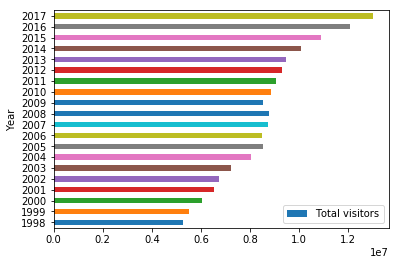

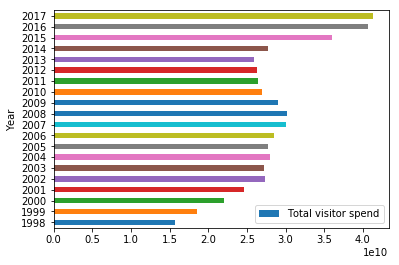

In [30]:
dfg_country = df_country.groupby('Year').agg(
    F.count('Year').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'),
    F.sum('Total visitor spend').alias('Total visitor spend'))

dfg_country = dfg_country.orderBy('Year', ascending=True)

some_df=dfg_country.toDF('Year', 'count', 'Total visitors', 'Total visitor spend')
pandaDf = some_df.toPandas()

df =  pandaDf 
ax = df.plot.barh(x='Year', y='Total visitors', rot=0)

df =  pandaDf 
ax = df.plot.barh(x='Year', y='Total visitor spend', rot=0)


+------------------------------+-----+--------------+
|Country of permanent residence|count|Total visitors|
+------------------------------+-----+--------------+
|          Africa and Middle...|  876|       3973171|
|                     Australia| 1032|      68146043|
|                        Canada|  851|       3295076|
|                         China|  746|      10409480|
|                       Germany|  847|       4647072|
|                         Japan|  824|       8424449|
|            Korea, Republic of|  594|       4977722|
|              Rest of Americas|  587|       2379300|
|                  Rest of Asia|  973|      13572767|
|                Rest of Europe|  979|      10957858|
|               Rest of Oceania|  742|       8394057|
|                            UK|  977|      17110987|
|                           USA|  993|      14893009|
+------------------------------+-----+--------------+

Total data points: 11021
Total data points: 11021


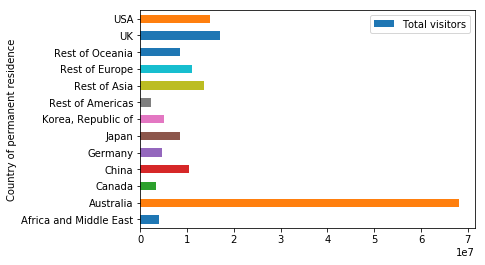

In [31]:
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_country = df_country.groupby('Country of permanent residence').agg(
    F.count('Country of permanent residence').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_country = dfg_country.orderBy('Country of permanent residence', ascending=True)

dfg_country.show()

# Total Number of records before removing null value
print("Total data points:", df_country.count())

# Total Number of records after removing null value
df_country = df_country.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

some_df=dfg_country.toDF('Country of permanent residence', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df =  pandaDf 
ax = df.plot.barh(x='Country of permanent residence', y='Total visitors', rot=0)


+--------------------+-----+--------------+
|    Purpose of visit|count|Total visitors|
+--------------------+-----+--------------+
|            Business| 4264|      20698010|
|  Holiday / vacation| 4264|      92895616|
|               Other| 4264|      13362432|
|Visiting friends ...| 4264|      48936504|
+--------------------+-----+--------------+

Total data points: 17056
Total data points: 11292


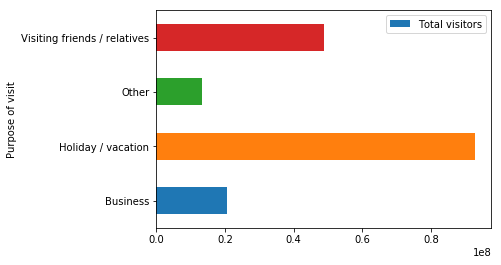

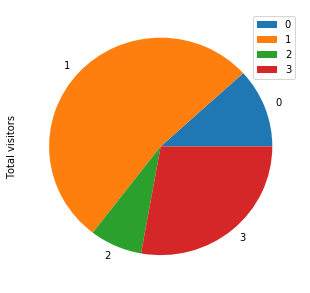

In [33]:
df_country=df_countryori
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_country = df_country.groupby('Purpose of visit').agg(
    F.count('Purpose of visit').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_country = dfg_country.orderBy('Purpose of visit', ascending=True)

dfg_country.show()

# Total Number of records before removing null value
print("Total data points:", df_country.count())

# Total Number of records after removing null value
df_country = df_country.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

some_df=dfg_country.toDF('Purpose of visit', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df = pd.DataFrame( pandaDf)
ax = df.plot.barh(x='Purpose of visit', y='Total visitors', rot=0)

df = pd.DataFrame( pandaDf)
plot = df.plot.pie(y='Total visitors', figsize=(5, 5))

+--------------------+-----+--------------+
|Airport of departure|count|Total visitors|
+--------------------+-----+--------------+
|            Auckland| 4262|     127947041|
|        Christchurch| 3604|      33641657|
|          Queenstown|  390|       3277265|
|          Wellington| 3036|      11026599|
+--------------------+-----+--------------+

Total data points: 11292
Total data points: 11292


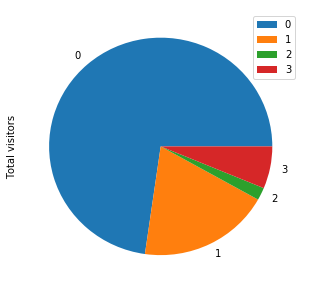

In [34]:
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_country = df_country.groupby('Airport of departure').agg(
    F.count('Airport of departure').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_country = dfg_country.orderBy('Airport of departure', ascending=True)

dfg_country.show()

# Total Number of records before removing null value
print("Total data points:", df_country.count())

# Total Number of records after removing null value
df_country = df_country.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

some_df=dfg_country.toDF('Airport of departure', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df =  pandaDf 
ax = df.plot.pie(y='Total visitors', figsize=(5, 5))

+--------------+-----+--------------+
|      Age band|count|Total visitors|
+--------------+-----+--------------+
|       20 - 24| 1280|      15872160|
|       25 - 29| 1280|      20828429|
|       30 - 34| 1280|      18232984|
|       35 - 39| 1280|      16199296|
|       40 - 44| 1280|      15234267|
|       45 - 49| 1280|      15755870|
|       50 - 54| 1280|      17231018|
|       55 - 59| 1280|      16164319|
|       60 - 64| 1280|      13969891|
|       65 - 69| 1280|      11545929|
|       70 - 74| 1280|       3313274|
|   75 or older| 1280|       1480980|
|Rather not say| 1280|        305143|
|      Under 20| 1280|       5047271|
+--------------+-----+--------------+

Total data points: 17920
Total data points: 11998


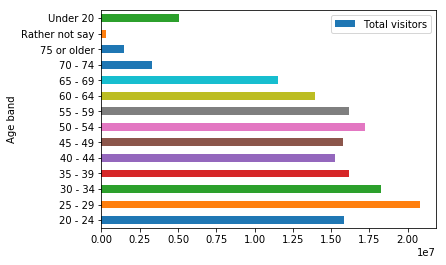

In [35]:
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_agegroup = df_agegroup.groupby('Age band').agg(
    F.count('Age band').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_agegroup = dfg_agegroup.orderBy('Age band', ascending=True)

dfg_agegroup.show()

# Total Number of records before removing null value
print("Total data points:", df_agegroup.count())

# Total Number of records after removing null value
df_agegroup = df_agegroup.na.drop()
# df_agegroup.show()
print("Total data points:", df_agegroup.count())

some_df=dfg_agegroup.toDF('Age band', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df = pd.DataFrame( pandaDf)
ax = df.plot.barh(x='Age band', y='Total visitors', rot=0)

+-----------------------+-----+--------------+
|Main accommodation used|count|Total visitors|
+-----------------------+-----+--------------+
|        A house you own|   80|        453024|
|     Another place w...|   80|        205156|
|            Backpackers|   80|      10524155|
|      Bed and Breakfast|   80|       2806359|
|     Camping at a Na...|   80|        697417|
|     Farm-stay or Ho...|   80|       2169527|
|     Free camping - ...|   80|        905357|
|                  Hotel|   80|      55749524|
|     House / flat th...|   80|       5015886|
|     In a hut at a N...|   80|        766142|
|     Luxury Accommod...|   80|       4424955|
|                  Marae|   80|        143045|
|     Motel, Motor In...|   80|      23147175|
|               NOT SURE|   80|       3260191|
|                  Other|   80|          3336|
|     Other camping g...|   80|       6572147|
|     Private Hotel /...|   80|        915198|
|     Staying with fa...|   80|      49191316|
|      Studen

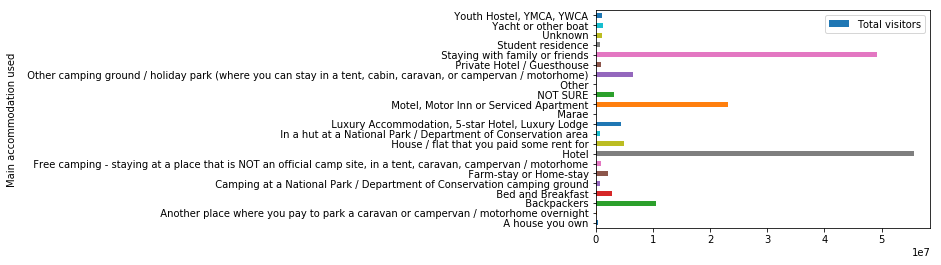

In [36]:
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_accomodation = df_accomodation.groupby('Main accommodation used').agg(
    F.count('Main accommodation used').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_accomodation = dfg_accomodation.orderBy('Main accommodation used', ascending=True)

dfg_accomodation.show()

# Total Number of records before removing null value
print("Total data points:", dfg_accomodation.count())

# Total Number of records after removing null value
dfg_accomodation = dfg_accomodation.na.drop()
# dfg_accomodation.show()
print("Total data points:", dfg_accomodation.count())

some_df=dfg_accomodation.toDF('Main accommodation used', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df = pd.DataFrame( pandaDf)
ax = df.plot.barh(x='Main accommodation used', y='Total visitors', rot=0)

In [37]:
#group by year
dfg_agegroup = df_agegroup.groupby('Age band', 'Year').agg(
    F.sum('Total visitors').alias('Total visitors by age band'))

dfg_agegroup.show()

#group by year
dfg_country = df_country.groupby('Country of permanent residence', 'Year').agg(
    F.sum('Total visitors').alias('Total visitors by country'))


ta = dfg_country.alias('ta')
tb = dfg_agegroup.alias('tb')

inner_join = ta.join(tb,  ["Year"]) 
inner_join.show()



+--------------+----+--------------------------+
|      Age band|Year|Total visitors by age band|
+--------------+----+--------------------------+
|       40 - 44|2016|                    978615|
|Rather not say|2007|                      1538|
|       45 - 49|2009|                    772692|
|       50 - 54|2004|                    816390|
|       60 - 64|2016|                   1061730|
|Rather not say|2006|                      3332|
|       50 - 54|2010|                    869228|
|       70 - 74|2006|                    183027|
|      Under 20|2010|                    225900|
|   75 or older|2006|                    110791|
|      Under 20|2016|                    301311|
|Rather not say|1998|                      9079|
|       60 - 64|2005|                    630087|
|       55 - 59|2000|                    501505|
|       30 - 34|2001|                    773890|
|      Under 20|2002|                    246765|
|       20 - 24|2005|                    794012|
|       50 - 54|2014

In [38]:
df_agegroup=df_agegroupori
dfg_agegroup = df_agegroup.groupby('Age band', 'Year').agg(
    F.sum('Total visitors').alias('Total visitors'))

dfg_agegroup.show()


some_df=dfg_agegroup.toDF('Year', 'Age band','Total visitors')
pandaDf = some_df.toPandas()


pandaDf.pivot(index='Age band', columns='Year', values='Total visitors')

+--------------+----+--------------+
|      Age band|Year|Total visitors|
+--------------+----+--------------+
|       40 - 44|2016|        978615|
|Rather not say|2007|          1538|
|       45 - 49|2009|        772692|
|       50 - 54|2004|        816390|
|       60 - 64|2016|       1061730|
|Rather not say|2006|          3332|
|       50 - 54|2010|        869228|
|       70 - 74|2006|        183027|
|      Under 20|2010|        225900|
|       70 - 74|1998|          null|
|   75 or older|2006|        110791|
|      Under 20|2016|        301311|
|Rather not say|1998|          9079|
|       60 - 64|2005|        630087|
|       55 - 59|2000|        501505|
|       30 - 34|2001|        773890|
|      Under 20|2002|        246765|
|       20 - 24|2005|        794012|
|       50 - 54|2014|        969661|
|       45 - 49|2005|        793621|
+--------------+----+--------------+
only showing top 20 rows



Year,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 or older,Rather not say,Under 20
Age band,,,,,,,,,,,,,,
1997,128220.0,178061.0,149019.0,132787.0,126440.0,124186.0,129995.0,100479.0,108913.0,118503.0,NaN,NaN,5034.0,42543.0
1998,455115.0,715281.0,651702.0,486529.0,513477.0,483770.0,498544.0,421092.0,421030.0,425109.0,NaN,NaN,9079.0,179589.0
1999,491278.0,708687.0,631775.0,507487.0,533857.0,486260.0,577140.0,467249.0,423995.0,516831.0,NaN,NaN,6857.0,177234.0
2000,519331.0,747567.0,715312.0,572178.0,581516.0,544217.0,616574.0,501505.0,479948.0,533297.0,NaN,NaN,11814.0,205159.0
2001,545066.0,839787.0,773890.0,625865.0,631578.0,612574.0,683926.0,541478.0,504054.0,547923.0,NaN,NaN,13207.0,234757.0
2002,558009.0,848724.0,806476.0,618938.0,651568.0,653859.0,714914.0,538325.0,515620.0,568001.0,NaN,NaN,14523.0,246765.0
2003,655971.0,948467.0,829646.0,639627.0,694562.0,675099.0,759500.0,643200.0,499300.0,590036.0,NaN,NaN,16770.0,273862.0
2004,738764.0,1030249.0,857481.0,803679.0,809817.0,709573.0,816390.0,710912.0,593703.0,723061.0,18509.0,9770.0,1487.0,225173.0
2005,794012.0,1064342.0,841695.0,882400.0,819041.0,793621.0,875944.0,758150.0,630087.0,485246.0,230197.0,98292.0,758.0,248584.0


In [119]:

# Total Number of records after removing null value
df_country = df_countryori.na.drop()


# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['Pkey', 'Year', 'Quarter', 'Total visitor spend'], outputCol = 'features')

# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(df_country)

# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- Pkey: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Year ending: string (nullable = true)
 |-- Airport of departure: string (nullable = true)
 |-- Purpose of visit: string (nullable = true)
 |-- Country of permanent residence: string (nullable = true)
 |-- Total visitor spend: double (nullable = true)
 |-- Total visitors: integer (nullable = true)
 |-- features: vector (nullable = true)



[Row(Pkey=1, Year=1997, Quarter=4, Year ending='YEDec 1997', Airport of departure='Auckland', Purpose of visit='Business', Country of permanent residence='Africa and Middle East', Total visitor spend=4266524.07, Total visitors=1684, features=DenseVector([1.0, 1997.0, 4.0, 4266524.07]))]

In [120]:
# Because the features have been combined into one vector, we no longer need them. Below we select the features and label.
vector_output = vector_output.select(['features', 'Total visitors', 'Year', 'Total visitor spend'])

# You can see that the dataframe now only contains two columns. 
print(vector_output.head(1))
vector_output.show(3)

[Row(features=DenseVector([1.0, 1997.0, 4.0, 4266524.07]), Total visitors=1684, Year=1997, Total visitor spend=4266524.07)]
+--------------------+--------------+----+-------------------+
|            features|Total visitors|Year|Total visitor spend|
+--------------------+--------------+----+-------------------+
|[1.0,1997.0,4.0,4...|          1684|1997|         4266524.07|
|[2.0,1997.0,4.0,1...|         67277|1997|      1.325885058E8|
|[3.0,1997.0,4.0,1...|          3596|1997|      1.558969421E7|
+--------------------+--------------+----+-------------------+
only showing top 3 rows



In [121]:
# Let's do a randomised 70/30 split. Remember, you should explain why you chose a particular split. 
train_data,test_data = vector_output.randomSplit([0.5,0.5])

# Let's see our training data.
print('train_data')
train_data.describe().show()

# And our testing data.
print('test_data')
test_data.describe().show()

train_data
+-------+------------------+-----------------+-------------------+
|summary|    Total visitors|             Year|Total visitor spend|
+-------+------------------+-----------------+-------------------+
|  count|              5646|             5646|               5646|
|   mean|14816.098122564648|2007.980340063762|4.849146675882392E7|
| stddev|31919.820873570465|5.842558161621888|9.769857458352837E7|
|    min|                 1|             1997|                2.4|
|    max|            308902|             2018|      1.231399751E9|
+-------+------------------+-----------------+-------------------+

test_data
+-------+------------------+------------------+--------------------+
|summary|    Total visitors|              Year| Total visitor spend|
+-------+------------------+------------------+--------------------+
|  count|              5646|              5646|                5646|
|   mean|16337.384342897627|2007.8962097059866|5.3357757180428535E7|
| stddev|  34475.1581894165| 5

In [122]:
# Importing the LR package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
lr = LinearRegression(featuresCol='features', labelCol='Total visitors')

# Fit the training data.
lr_model = lr.fit(train_data)


# Make predictions.
predictions = lr_model.transform(test_data)


# Select example rows to display.
predictions.select( "Total visitors", "features").show(5)

# Print the coefficients.
print('Linear Regression')
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
lr_summary = lr_model.summary

print("Coefficient Standard Errors: " + str(lr_summary.coefficientStandardErrors))
print("meanAbsoluteError: " + str(lr_summary.meanAbsoluteError))
print("meanSquaredError: " + str(lr_summary.meanSquaredError))

print("numIterations: %d" % lr_summary.totalIterations)
print("objectiveHistory: %s" % str(lr_summary.objectiveHistory))
lr_summary.residuals.show()

# Print RMSE. 
print("RMSE on training data: " + str(lr_summary.rootMeanSquaredError))

# Print R2.
print("R2 on training data: " + str(lr_summary.r2))

+--------------+--------------------+
|Total visitors|            features|
+--------------+--------------------+
|          1684|[1.0,1997.0,4.0,4...|
|          3519|[7.0,1997.0,4.0,6...|
|           424|[8.0,1997.0,4.0,1...|
|          6677|[10.0,1997.0,4.0,...|
|         16559|[13.0,1997.0,4.0,...|
+--------------+--------------------+
only showing top 5 rows

Linear Regression
Coefficients: [-0.028645649771706725,151.43997656034122,87.55900705300023,0.000294579681011608]
Intercept: -303526.92076464643

Coefficient Standard Errors: [0.04220674828086386, 32.60599188900218, 176.42947080133024, 1.8695039035901267e-06, 65345.48188646172]
meanAbsoluteError: 5181.701624930591
meanSquaredError: 187787321.36393678
numIterations: 1
objectiveHistory: [0.0]
+-------------------+
|          residuals|
+-------------------+
|  28970.22909236286|
|-245.26966506801546|
|  2465.570336227829|
| 1025.5724609551253|
|-1345.8707105462672|
| 2715.3723740545684|
|  3170.856933431234|
| 2492.734855838236

Text(0,0.5,'Beta Coefficients')

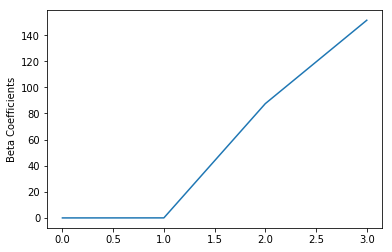

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

In [124]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test_data)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print('Linear Regression')
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

Linear Regression
RMSE on test data: 14698.58697899841
R2 on test data: 0.8181909214715369


In [125]:
from pyspark.ml.regression import GeneralizedLinearRegression

glr = GeneralizedLinearRegression(featuresCol='features', labelCol='Total visitors')

# Fit the model
glr_model = glr.fit(train_data)

print("Generalized Linear Regression")
print("------------------------------")
# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(glr_model.coefficients))
print("Intercept: " + str(glr_model.intercept))

# Summarize the model over the training set and print out some metrics
glr_summary = glr_model.summary
print("Coefficient Standard Errors: " + str(glr_summary.coefficientStandardErrors))
print("T Values: " + str(glr_summary.tValues))
print("P Values: " + str(glr_summary.pValues))
print("Dispersion: " + str(glr_summary.dispersion))
print("Null Deviance: " + str(glr_summary.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(glr_summary.residualDegreeOfFreedomNull))
print("Deviance: " + str(glr_summary.deviance))
print("Residual Degree Of Freedom: " + str(glr_summary.residualDegreeOfFreedom))
print("AIC: " + str(glr_summary.aic))
print("------------------------------")
print("Deviance Residuals: ")
glr_summary.residuals().show()

# Make predictions.
predictions = glr_model.transform(test_data)


# Select example rows to display.
predictions.select( "Total visitors", "features").show(5)


Generalized Linear Regression
------------------------------
Coefficients: [-0.028645649771706725,151.43997656034122,87.55900705300023,0.000294579681011608]
Intercept: -303526.92076464643
Coefficient Standard Errors: [0.042206748280863855, 32.60599188900218, 176.42947080133024, 1.8695039035901267e-06, 65345.48188646171]
T Values: [-0.6786983347090587, 4.6445443854576025, 0.4962833400526192, 157.57104355113032, -4.644956498936328]
P Values: [0.49735686366060117, 3.4856486341716675e-06, 0.6197138553852835, 0.0, 3.478724375227671e-06]
Dispersion: 187953769.97354847
Null Deviance: 5751549175171.641
Residual Degree Of Freedom Null: 5645
Deviance: 1060247216420.787
Residual Degree Of Freedom: 5641
AIC: 123595.58708713479
------------------------------
Deviance Residuals: 
+-------------------+
|  devianceResiduals|
+-------------------+
|  28970.22909236286|
|-245.26966506801546|
|  2465.570336227829|
| 1025.5724609551253|
|-1345.8707105462672|
| 2715.3723740545684|
|  3170.856933431234|
| 2

Text(0,0.5,'Beta Coefficients')

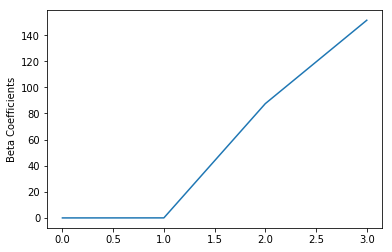

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(glr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

In [127]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Train a DecisionTree model.
dt = DecisionTreeRegressor(featuresCol='features', labelCol='Total visitors')

# Train model.  This also runs the indexer.
dtmodel = dt.fit(train_data)

# Make predictions.
predictions = dtmodel.transform(test_data)

# Select example rows to display.
predictions.select( "Total visitors", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Total visitors", predictionCol="prediction", metricName="rmse")

print('Decision Tree Regressor')
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+--------------+--------------------+
|Total visitors|            features|
+--------------+--------------------+
|          1684|[1.0,1997.0,4.0,4...|
|          3519|[7.0,1997.0,4.0,6...|
|           424|[8.0,1997.0,4.0,1...|
|          6677|[10.0,1997.0,4.0,...|
|         16559|[13.0,1997.0,4.0,...|
+--------------+--------------------+
only showing top 5 rows

Decision Tree Regressor
Root Mean Squared Error (RMSE) on test data = 14692.8


In [128]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator


# Train a RandomForest model.
rf = GBTRegressor(featuresCol='features', labelCol='Total visitors')

# Train model.  This also runs the indexer.
rf_model = rf.fit(train_data)

# Make predictions.
predictions = rf_model.transform(test_data)

# Select example rows to display.
predictions.select( "Total visitors", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Total visitors", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print('Gradient-boosted tree regression')
print('--------------------------------')
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+--------------+--------------------+
|Total visitors|            features|
+--------------+--------------------+
|          1684|[1.0,1997.0,4.0,4...|
|          3519|[7.0,1997.0,4.0,6...|
|           424|[8.0,1997.0,4.0,1...|
|          6677|[10.0,1997.0,4.0,...|
|         16559|[13.0,1997.0,4.0,...|
+--------------+--------------------+
only showing top 5 rows

Gradient-boosted tree regression
--------------------------------
Root Mean Squared Error (RMSE) on test data = 15454.3


In [133]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator


# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol='features', labelCol='Total visitors')

# Train model.  This also runs the indexer.
rf_model = rf.fit(train_data)

# Make predictions.
predictions = rf_model.transform(test_data)

# Select example rows to display.
predictions.select( "Total visitors", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Total visitors", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print('Random Forest Regressor')
print('-------------------------')
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)



+--------------+--------------------+
|Total visitors|            features|
+--------------+--------------------+
|          1684|[1.0,1997.0,4.0,4...|
|          3519|[7.0,1997.0,4.0,6...|
|           424|[8.0,1997.0,4.0,1...|
|          6677|[10.0,1997.0,4.0,...|
|         16559|[13.0,1997.0,4.0,...|
+--------------+--------------------+
only showing top 5 rows

Random Forest Regressor
-------------------------
Root Mean Squared Error (RMSE) on test data = 15367.9
